# Learning Curves (Curvas de Aprendizaje)
Son curvas donde la vertical almacena el error, dada una funcion de costo. En la horizontal la cantidad datos usados. Normalmente se grafican las pruebas de validacion y de entrenamiento.

El objeto de estas curvas es un dianostico de "overfitting" o "underfitting".


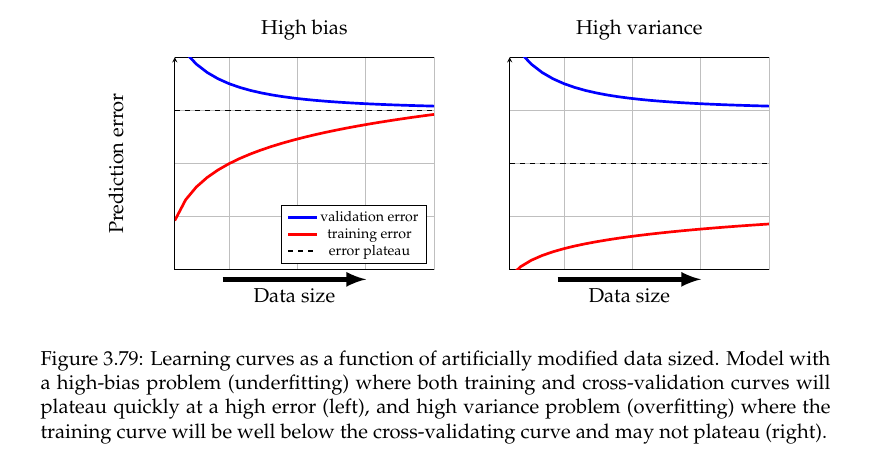

* High bias (sesgo alto): Asociado a esto es "underfitting" (subajuste) El caso de la curva sobre la izquierda. Mientras el error de entrenamiento se acerca al de validacion, el limite (la asintota) es alta. Posibles correcciones:
    * Agregar mas "features" (parametros).
    * Disminuir $\lambda$ si hay regularizacion.

* High Varianza (varianza alta) (asociado a esto es overfitting/sobreajuste): Un sintoma de este fenomeno se da cuando la separacion asintotica es grande.
    * Se puede remediar incrementando mas datos.
    * Disminuyendo parametros.
    * Incrementando $\lambda$, con regularizacion.


#SVM : Support Vector Machines (Maquinas de soporte vectorial).

Para que sirven?

* Clasificacion (aca es donde mas se usan)
* regresion
* outlier detection (deteccion de muestras anomalas)

Nosotros lo usamos como una herramienta de clasificacion.


## Historia y motivacion.
Comenzo en los 1960s tempranos. El ruso Vladimir Vapnik lo desarrollo dentro de su tesis de doctorado ?  
El metodo no se hizo famoso, hasta 1992 que el viajo a USA a trabar con laboratorios Bell. El sometio tres articulos a
la revista
[Conference on Neural Information Processing Systems](https://neurips.cc/) . Sin embargo los tres articulos fueron rechazados.


Vapnik estaba muy interesado en reconocimiento de caracteres. Tomandose un cafe con un companhero de trabajo apostaron a que SVM era mejor en el reconocimiento de caracteres que otras tecnicas (logistic regression ?).  El gano la apuesta y esto comenzo a darle mas peso al metodo SVM.

Explico a mano alzada la idea.


En regresion lineal minimizamos la funcion de costo
Piense en una linea con pendiente $a$ y intercepto $b$.


$$J(a,b) = \frac{1}{2m} \sum_{i=1}^m [ y_i - (ax_i + b)]^2 .$$

En SVM queremos **maximar** el ancho de la "via". Conceptualmente queremos maximizar la suma de las distancias (al cuadrado), pero distancias normales al centro de la via.

En simbolos


$$ J(a,b) = \frac{1}{2m} \sum_{i=1}^m d^2[ (x_i,y_i), L(a,b)].$$

Las aplicaciones son muchas pero no las voy a discutir. Las encuentran en todas partes. De las ventajas hablamos en un momento.

[Aplications of SVM](https://medium.com/@mun.articles/svms-in-practice-applications-and-use-cases-for-machine-learnings-most-effective-model-2ae25f4207ef).

### Discusion:
Para la discusion usamos un ejemplo con 2 clusters (grupos). Uno amarillo y otro rojo. Pensamos en la mejor forma de separarlos.






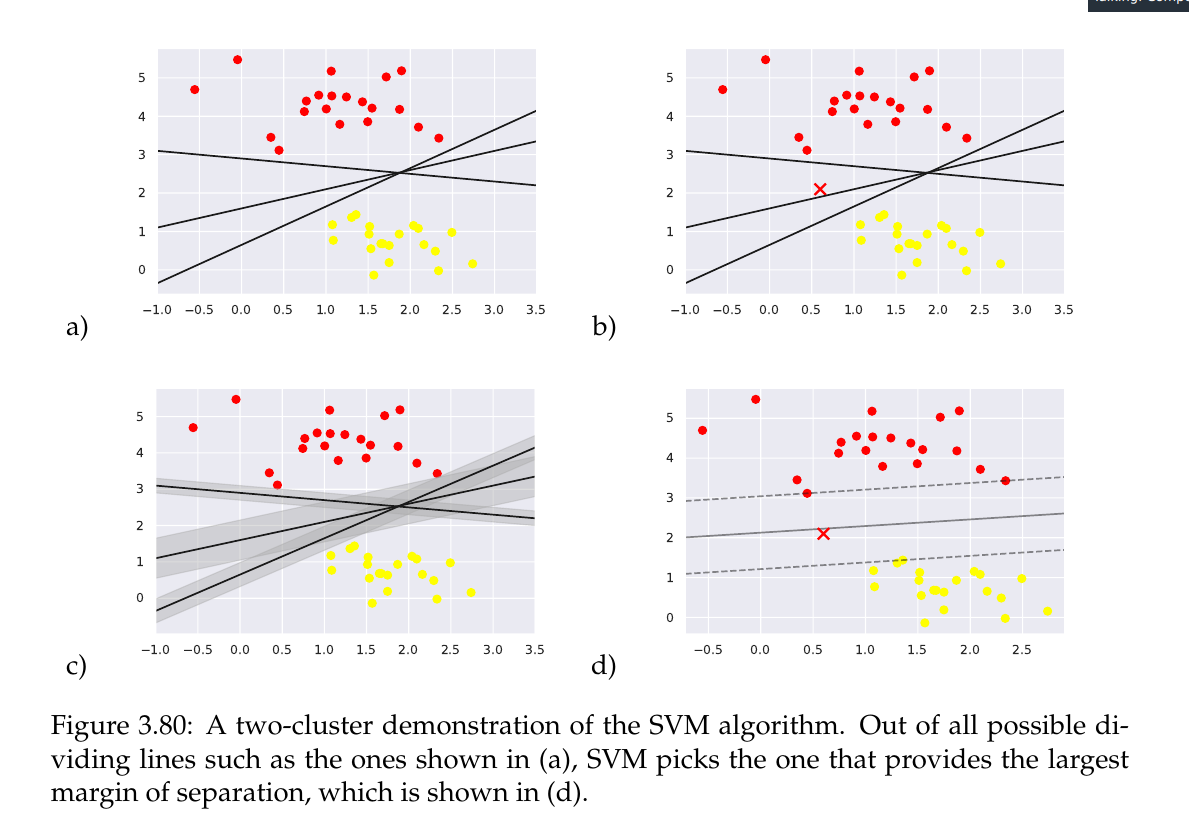

* En el caso de $n$ dimensiones, en vez de la linea media es un hiperplano en $\mathbb{R}^n$, pero las dimensiones del hiperplano son $n-1$. El problema del
[curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

Cuando $n \gg 1$, los puntos quedan damasiado "regados".
Entonces estadisticamente el experimento sufre de baja densidad en los datos. Ajustar modelos ahi es dificil.

Sin embargo SVVM presenta una ventaja en eficiencia. Es que los vectores de soporte son muy pequenhos comparados con los datos.
El problema es "insensible" a la cantidad de datos, **a no ser que** los nuevos datos caigan dentro de las margenes optimizadas por los datos anteriores.




## Funcion de costo para el SVM.
Como en casi todos los metodos de ML estudiados, la funcion de costo es central a la consecucion de parametros.  El SVM presenta una ventaja y es que es muy intuitivo.


Para entender la deduccion de la funcion de costo incluimos una nueva grafica.




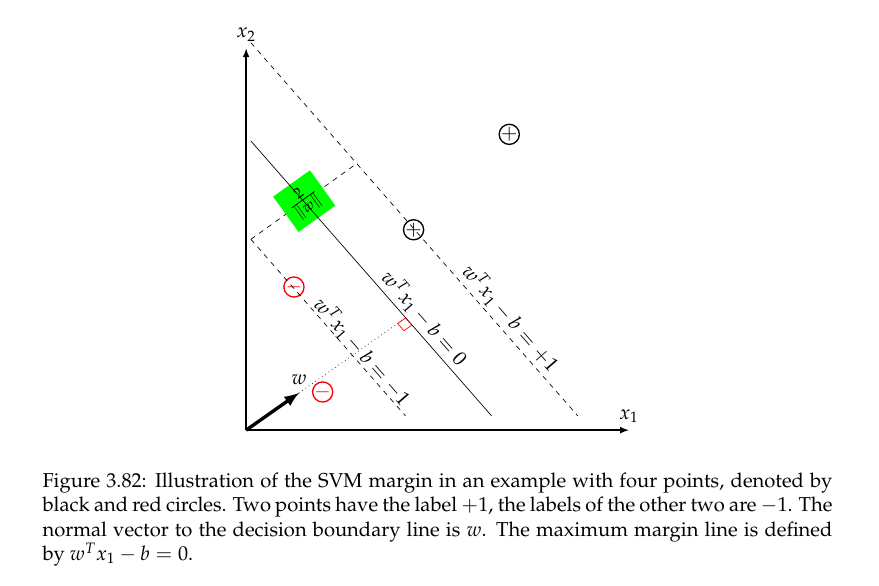

Me baso en la Figura 3.82. Tenemos dos "clusters" el de los positivos de valor 1 ($\oplus$) y los negativos de valor -1 (${\ominus}$).  

Llevemos el problema a la forma minima (mas sencilla).
2D. La recta de pendiente $a$ e intercepto $-b$, esta dada por
$x_2 = a x_1 - b$.


Entonces escribimos esta recta de la siguiente forma


\begin{eqnarray}
x_2 &=& a x_1 - b \\
0 &=& a x_1 - x_2 - b \\
0 &=& \binom{a}{-1}^T \binom{x_1}{x_2} - b
\end{eqnarray}
Lo bonito de esta representacion es que se generaliza a cualquier numero de dimensiones. Es decir considere $w,x \in \mathbb{R}^n$,
etonces tenemos el plano normal a $w$ y con intecepto $b$ como


$$0 = w^T x - b .$$
En este punto recordamos la tarea al principio del semestre.


Esta es la linea divisoria.
Podemos alejarnos una distancia $\delta$ con la ecuacion


$$ \delta = w^T x - b .$$
Los puntos en la recta divisoria corresponden a $\delta=0$.
Recuerden que tenemos dos tipos de puntos los $1$ y los $-1$. Etiquetas $y^{(i)} = \pm 1$.

Podemos escribir


$$w^T x^{(i)} - b \ge 0 \quad \text{si} \quad y^{(i)} = 1 .$$
$$w^T x^{(i)} - b < 0 \quad \text{si} \quad y^{(i)} = -1 .$$


Pude haber escrito
$$w^T x^{(i)} - b = \delta \quad \text{si} \quad y^{(i)} = 1 .$$
$$w^T x^{(i)} - b = - \delta \quad \text{si} \quad y^{(i)} = -1 .$$

Las dos ecuaciones anteriores se pueden escribir de forma simultanea.

$$y^{(i)} ( w^T x^{(i)} - b)  = \delta. \tag{1} $$

De la tarea en algebra lineal sobre planos paralelos recordamos que
$w^T x - b = \pm \delta$ son dos planos paralelos y que la distancia entre estos dos planos esta dada por

$$ \text{dos veces el margen} = \frac{2 \delta}{\| w \|} .$$
el margen es la distancia del centro a la berma.

Aca tenemos los siguientes parametros

* $\delta$
* w
* b
Vamos a eliminar uno de los parametros. En $w$ no hemos puesto restricciones.  Consideremos $\delta > 0$
En la Ecuacion (1) dividmos por $\delta$

$$  y^{(i)} \left (  \left ( \frac{w}{\delta} \right )^T - \frac{b}{\delta} \right ) = 1.$$
Pero como yo no tengo restricciones en $w$ y en $b$ puedo cambiar este problema haciendo la siguiente sustitucion

$$ w \leftarrow \frac{w}{\delta}$$
$$ b \leftarrow \frac{b}{\delta}$$
quedando


Queremos **maximizar**
$$\frac{2}{ \| w \|} .$$
sujeto a la
**Restriccion**
$$y^{(i)} ( w - b) = 1 .$$

Los puntos deben estar todos ( $\oplus$, $\ominus$) satifaciendo

**Restriccion**
$$y^{(i)} ( w - b) \ge 1 .$$

Nosotros estamos mas acostumbrados a

* minimzar
* usar cuadrados
Entonces maximiza $2/ \| w \|^2$ es equivalente a minimizar
$$\frac{ \| w \|^2}{2}.$$

En resumen el problema que queremos opitimizar es:


$$\min_{w} \frac{\| w \|^2}{2} \quad \text{sujeto a } \quad y^{(i)} ( w^T x^{(i)} - b) \ge 1.$$

Este es un problema clasico de **multiplicadores de Lagrange**, pero como no se usa igualdad sino desigualdad se conoce (con desigualdad)como el metodo de
[Karush-Kuhn-Tucker (KKT)](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions#:~:text=In%20mathematical%20optimization%2C%20the%20Karush,some%20regularity%20conditions%20are%20satisfied.)


Este problema lo vamos vamos a resolver en la siguiente clase.
Vamos a cambiar este problema por otro mas facil de resolver.
Pero antes vamos a hablar de Kernels.

# Proxima clase Kernels.
Motivacion **carretaeras curvas**



